In [0]:
cd /content/drive/My Drive/final_thesis

/content/drive/My Drive/final_thesis


(509, 2) (57, 2) (509,) (57,)
Epoch 1/200
16/16 [==============================] - 0s 10ms/step - loss: 1.2874 - accuracy: 0.3281 - val_loss: 1.1943 - val_accuracy: 0.3684
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1948 - accuracy: 0.3281 - val_loss: 1.1372 - val_accuracy: 0.3684
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1387 - accuracy: 0.3418 - val_loss: 1.0988 - val_accuracy: 0.4386
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 1.1013 - accuracy: 0.5187 - val_loss: 1.0716 - val_accuracy: 0.6491
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0724 - accuracy: 0.6208 - val_loss: 1.0501 - val_accuracy: 0.6842
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0488 - accuracy: 0.6326 - val_loss: 1.0290 - val_accuracy: 0.6842
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0270 - accuracy: 0.6287 - val_loss: 1.0058 - val

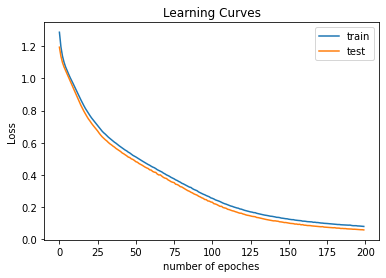

In [0]:
from numpy.random import seed
seed(1)
import tensorflow                                                                                                                  
tensorflow.random.set_seed(2)
# mlp for multiclass classification
from matplotlib import pyplot as plt
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
# load the dataset
df = read_csv('/content/drive/My Drive/final_thesis/train.csv', header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_shape=(n_features,)))
#model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer = 'Adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size = 32, shuffle = True, verbose=1, validation_data = (x_test, y_test))

model.save('/content/drive/My Drive/final_thesis/final_weight.h5')
# evaluate the model
#loss, acc = model.evaluate(x_test, y_test, verbose=0)
#print('Test Accuracy: %.3f' % acc)

# plot learning curves
plt.title('Learning Curves')
plt.xlabel('number of epoches')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#plt.savefig("Loss.pdf")
plt.show()

In [0]:
import numpy as np
predict = list()
for i in range(0, len(predicted)):
  predict.append(argmax(predicted[i]))
test = np.array(predict)
matrix = confusion_matrix(y_test, test)
print(matrix)

[[18  0  0]
 [ 0 18  0]
 [ 0  0 21]]


In [0]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


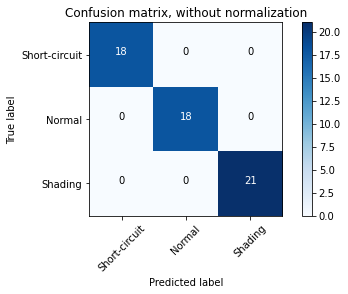

In [0]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = ['Short-circuit', 'Normal', 'Shading']
plt.figure()
plot_confusion_matrix(matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      #title='Normalized confusion matrix')

plt.show()

In [0]:
# class:
# 0 : short circuit
# 1 : normal
# 2 : shading
row = [0.660029412, 0.469906323]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.44 0.02 0.54]] (class=2)


In [0]:
# class:
# 0 : short circuit
# 1 : normal
# 2 : shading
row = [0.860029412, 0.869906323]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[5.02e-04 9.99e-01 5.07e-04]] (class=1)


(396, 2) (170, 2) (396,) (170,)
Epoch 1/250
13/13 [==============================] - 0s 20ms/step - loss: 1.3124 - accuracy: 0.3207 - val_loss: 1.2019 - val_accuracy: 0.3588
Epoch 2/250
13/13 [==============================] - 0s 8ms/step - loss: 1.2266 - accuracy: 0.3207 - val_loss: 1.1447 - val_accuracy: 0.3588
Epoch 3/250
13/13 [==============================] - 0s 7ms/step - loss: 1.1667 - accuracy: 0.3207 - val_loss: 1.1077 - val_accuracy: 0.3588
Epoch 4/250
13/13 [==============================] - 0s 8ms/step - loss: 1.1297 - accuracy: 0.3712 - val_loss: 1.0816 - val_accuracy: 0.5412
Epoch 5/250
13/13 [==============================] - 0s 6ms/step - loss: 1.1013 - accuracy: 0.5631 - val_loss: 1.0614 - val_accuracy: 0.6765
Epoch 6/250
13/13 [==============================] - 0s 6ms/step - loss: 1.0780 - accuracy: 0.6035 - val_loss: 1.0439 - val_accuracy: 0.6765
Epoch 7/250
13/13 [==============================] - 0s 7ms/step - loss: 1.0601 - accuracy: 0.5783 - val_loss: 1.0276 - v

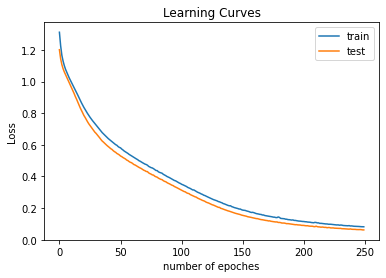

In [1]:
from numpy.random import seed
seed(1)
import tensorflow                                                                                                                  
tensorflow.random.set_seed(2)
# mlp for multiclass classification
from matplotlib import pyplot as plt
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
# load the dataset
df = read_csv('/content/drive/My Drive/final_thesis/train.csv', header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', input_shape=(n_features,)))
#model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer = 'Adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=250, batch_size = 32, shuffle = True, verbose=1, validation_data = (x_test, y_test))

model.save('/content/drive/My Drive/final_thesis/final_weight_0.3.h5')
# evaluate the model
#loss, acc = model.evaluate(x_test, y_test, verbose=0)
#print('Test Accuracy: %.3f' % acc)

# plot learning curves
plt.title('Learning Curves')
plt.xlabel('number of epoches')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#plt.savefig("Loss.pdf")
plt.show()

In [2]:
import numpy as np
predicted = model.predict(x_test)
predict = list()
for i in range(0, len(predicted)):
  predict.append(argmax(predicted[i]))
test = np.array(predict)
matrix = confusion_matrix(y_test, test)
print(matrix)

[[51  0  0]
 [ 0 57  1]
 [ 0  0 61]]


In [3]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.994


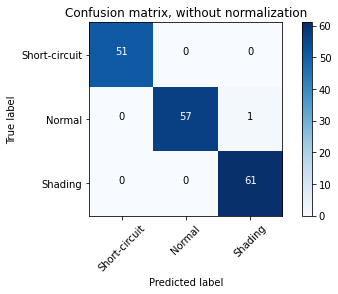

In [4]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = ['Short-circuit', 'Normal', 'Shading']
plt.figure()
plot_confusion_matrix(matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('Ma trận nhầm lẫn')
plt.show()

In [5]:
# class:
# 0 : short circuit
# 1 : normal
# 2 : shading
row = [0.660029412, 0.469906323]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.44940844 0.02069972 0.5298918 ]] (class=2)


In [6]:
# class:
# 0 : short circuit
# 1 : normal
# 2 : shading
row = [0.860029412, 0.869906323]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[5.3740689e-04 9.9889922e-01 5.6337053e-04]] (class=1)


In [7]:
from sklearn import metrics
print(metrics.classification_report(y_test, test, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        51
           1      1.000     0.983     0.991        58
           2      0.984     1.000     0.992        61

    accuracy                          0.994       170
   macro avg      0.995     0.994     0.994       170
weighted avg      0.994     0.994     0.994       170

